In [1]:
%pip install numpy pandas matplotlib seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Note: you may need to restart the kernel to use updated packages.


In [4]:
# ==========================================
# 1. Load the dataset and display basic information
# ==========================================
print("--- Q1: Basic Information ---")

# Load the CSV file
# Ensure 'data.csv' is in the same folder as this script
df = pd.read_csv('../assets/Student_Performance.csv')

# Display basic info (rows, columns, data types)
print("Dataset Info:")
print(df.info())

# Display the first 5 rows to check the data
print("\nFirst 5 rows:")
print(df.head())

--- Q1: Basic Information ---
Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     10000 non-null  int64  
 1   Stu_ID         10000 non-null  str    
 2   Atten_Percent  10000 non-null  float64
 3   Assig_Sc       10000 non-null  float64
 4   Mid_Sc         10000 non-null  float64
 5   Final_Sc       10000 non-null  float64
 6   Proj_Sc        10000 non-null  float64
 7   Parti_Sc       10000 non-null  float64
 8   Overall_Sc     10000 non-null  float64
 9   Status         10000 non-null  str    
dtypes: float64(7), int64(1), str(2)
memory usage: 781.4 KB
None

First 5 rows:
   Unnamed: 0        Stu_ID  Atten_Percent  Assig_Sc  Mid_Sc  Final_Sc  \
0           0  STU202400001          85.93     60.76   70.91     70.90   
1           1  STU202400002          83.58     51.84   75.81     71.52   
2           2  STU202400003  

In [5]:
# ==========================================
# 2. Compute summary statistics
# ==========================================
print("\n--- Q2: Summary Statistics ---")

# .describe() calculates count, mean, std, min, max, and quartiles
summary_stats = df.describe()
print(summary_stats)


--- Q2: Summary Statistics ---
        Unnamed: 0  Atten_Percent      Assig_Sc        Mid_Sc      Final_Sc  \
count  10000.00000   10000.000000  10000.000000  10000.000000  10000.000000   
mean    4999.50000      80.544017     71.930920     67.757183     65.670865   
std     2886.89568      10.704865     14.654127     17.553359     15.900996   
min        0.00000      60.000000     16.020000      7.080000      8.060000   
25%     2499.75000      72.900000     61.760000     55.830000     54.910000   
50%     4999.50000      81.970000     72.055000     68.070000     65.775000   
75%     7499.25000      89.220000     82.350000     80.272500     76.730000   
max     9999.00000      99.950000    100.000000    100.000000    100.000000   

            Proj_Sc      Parti_Sc    Overall_Sc  
count  10000.000000  10000.000000  10000.000000  
mean      74.866044     71.265324     69.591873  
std       12.737219     11.064700      8.772970  
min       26.400000     26.230000     35.220000  
25%   

In [6]:
# ==========================================
# 3. Check missing values and outliers
# ==========================================
print("\n--- Q3: Missing Values & Outliers ---")

# A. Check for missing values
print("Missing Values per Column:")
print(df.isnull().sum())

# B. Check for Outliers using the IQR (Interquartile Range) Method
# Select only numeric columns for analysis
numeric_cols = df.select_dtypes(include=['number']).columns

print("\nOutlier Detection (IQR Method):")
for col in numeric_cols:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    if not outliers.empty:
        print(f" -> Outliers in '{col}': {outliers.values} (Count: {len(outliers)})")
    else:
        print(f" -> No outliers in '{col}'")


--- Q3: Missing Values & Outliers ---
Missing Values per Column:
Unnamed: 0       0
Stu_ID           0
Atten_Percent    0
Assig_Sc         0
Mid_Sc           0
Final_Sc         0
Proj_Sc          0
Parti_Sc         0
Overall_Sc       0
Status           0
dtype: int64

Outlier Detection (IQR Method):
 -> No outliers in 'Unnamed: 0'
 -> No outliers in 'Atten_Percent'
 -> Outliers in 'Assig_Sc': [29.27 28.34 30.81 25.99 24.05 29.53 29.15 24.97 27.68 21.37 21.86 29.3
 25.   23.67 17.71 26.91 27.15 29.84 21.08 22.98 27.45 18.28 30.1  16.02
 29.62 30.69 22.15 26.83 25.41 25.12 23.68 30.71 29.16 30.51 26.47 30.86] (Count: 36)
 -> Outliers in 'Mid_Sc': [16.15 18.9  14.08 17.36  7.08 14.23 10.25  9.2  15.77 16.71 17.79 18.23
 17.68 14.44  7.67 18.42  9.02 13.37 15.98  8.68 18.02 14.41 18.1  18.9
 13.74 12.6  17.28 13.39 19.12 10.21 15.33 17.63 13.47] (Count: 33)
 -> Outliers in 'Final_Sc': [18.27 20.42 21.78 16.18 21.65  8.06 17.09 12.09  9.7  15.76 18.85 17.24
 22.11  9.02 17.05 16.8  22.12 1


--- Q4: Generating Plots ---


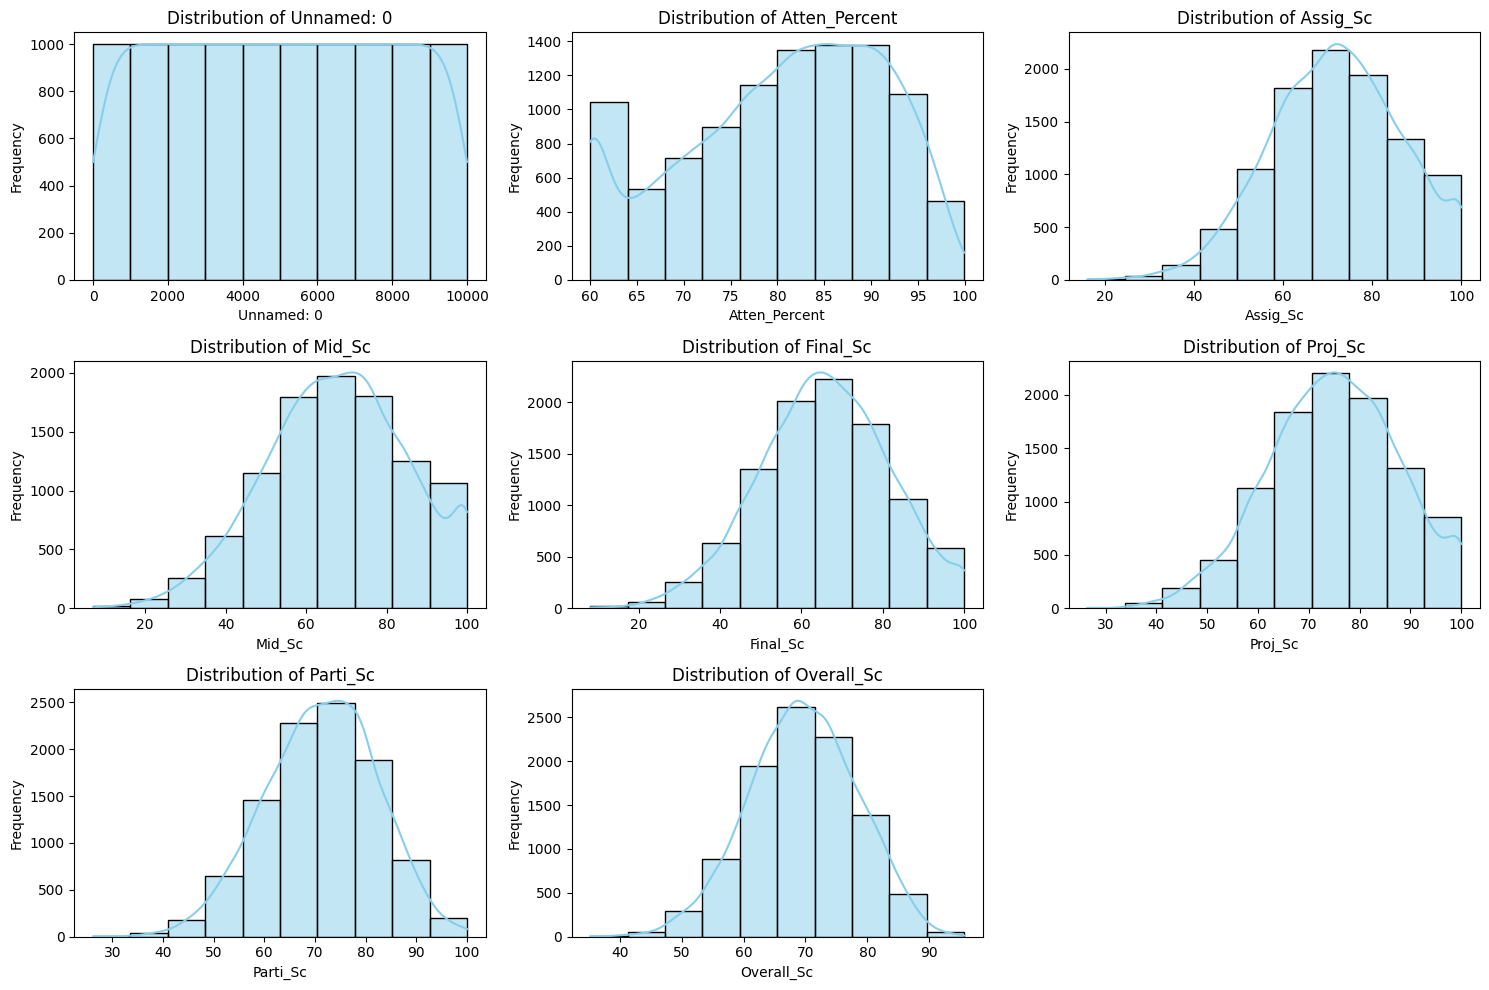

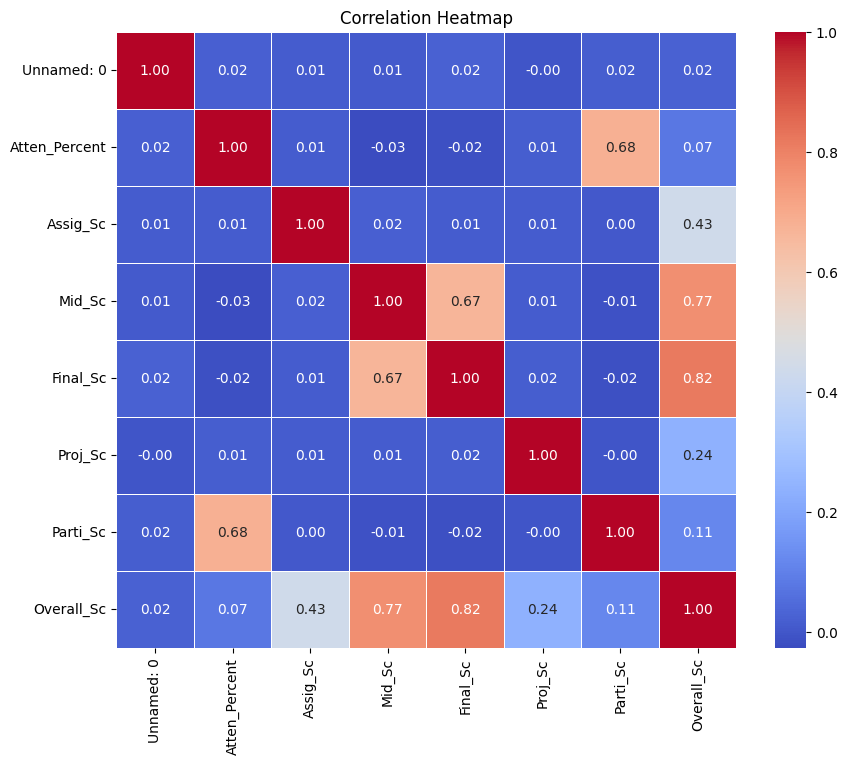

In [7]:
# ==========================================
# 4. Plot feature distributions and correlation heatmap
# ==========================================
print("\n--- Q4: Generating Plots ---")

# A. Plot Feature Distributions (Histograms)
# We calculate the grid size for subplots
num_cols = len(numeric_cols)
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)  # Create a grid (3 rows, 3 columns)
    sns.histplot(df[col], kde=True, bins=10, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# B. Plot Correlation Heatmap
plt.figure(figsize=(10, 8))

# Calculate correlation matrix
corr_matrix = df[numeric_cols].corr()

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation of all features with the target 'Overall_Sc'
target_correlation = numeric_df.corr()['Overall_Sc'].sort_values(ascending=False)

#Print the result
print("correlation with target (Overall_Sc):")
print(target_correlation)

correlation with target (Overall_Sc):
Overall_Sc       1.000000
Final_Sc         0.817031
Mid_Sc           0.771061
Assig_Sc         0.434784
Proj_Sc          0.235450
Parti_Sc         0.113733
Atten_Percent    0.074640
Unnamed: 0       0.022114
Name: Overall_Sc, dtype: float64
